In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [4]:
mnist = input_data.read_data_sets("datasets/MNIST_data/", one_hot=True)

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


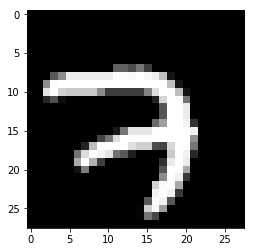

In [11]:
random_image = mnist.train.images[0].reshape(28, 28)
plt.imshow(random_image, cmap="gist_gray")

In [26]:
input_dim = 784
output_dim = 10

# Placeholders
X = tf.placeholder(tf.float32, shape=[None, input_dim])
y = tf.placeholder(tf.float32, shape=[None, output_dim])

# Variables
W = tf.Variable(tf.zeros((input_dim, output_dim)))
b = tf.Variable(tf.zeros((output_dim)))

# Graph operations
z = tf.matmul(X, W) + b

# Loss function
# softmax_cross_entropy_with_logits will have same effect as 
# applying softmax first, and then cross entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(loss)

# initializer 
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    sess.run(init)
    steps = 10000
    for step in range(steps):
        batch_X, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={X: batch_X, y: batch_y})
        loss_step = sess.run(loss, feed_dict={X: batch_X, y: batch_y})
        if step % 500 == 0:
            print("Loss at step {0}: {1:.3f}".format(step, loss_step))
    
    # Evaluation
    # These are different graph operations
    correct_prediction = tf.equal(tf.argmax(z, 1), tf.argmax(y, 1))
    # cast into float
    correct_prediction = tf.cast(correct_prediction, tf.float32)
    # calculate accuracy
    accuracy = tf.reduce_mean(correct_prediction)
    result = sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print("Accuracy: {0:.3f}%".format(result * 100))

Loss at step 0: 2.091
Loss at step 500: 0.407
Loss at step 1000: 0.338
Loss at step 1500: 0.305
Loss at step 2000: 0.456
Loss at step 2500: 0.184
Loss at step 3000: 0.421
Loss at step 3500: 0.262
Loss at step 4000: 0.513
Loss at step 4500: 0.378
Loss at step 5000: 0.313
Loss at step 5500: 0.446
Loss at step 6000: 0.342
Loss at step 6500: 0.172
Loss at step 7000: 0.176
Loss at step 7500: 0.300
Loss at step 8000: 0.225
Loss at step 8500: 0.163
Loss at step 9000: 0.122
Loss at step 9500: 0.251
Accuracy: 92.300%
